# PROBLEM 8: Grid and Time Stepping Considerations

### Table 8.1. Grid data

                                                  Well locations (row, column)

| Grid | Size  | Grid Spacing            | Pumping Well | Well 1 | Well 2 | Well 3 |
|------|-------|-------------------------|--------------|--------|--------|--------|
| 1    | 4\*4   | 2500 row, column 1      | 3,2          | 2,2    | 2,3    | 3,3    |
|      |       | 500 row, column 2,3      |              |        |        |        |
|      |       | 2500 row, column 4       |              |        |        |        |
| 2    | 7\*7   | 1750 row, column 1      | 5,3          | 3,3    | 3,5    | 5,5    |
|      |       | 2000 row, column 2       |              |        |        |        |
|      |       | 2500 row, column 3-5     |              |        |        |        |
|      |       | 1750 row, column 7       |              |        |        |        |
| 3    | 10\*10 | 1250 row, column 1      | 7,4          | 4,4    | 4,7    | 7,7    |
|      |       | 1666.7 row, column 2-9   |              |        |        |        |
|      |       | 1250 row, colum 10       |              |        |        |        |
| 4    | 16\*16 | 500 row, column 1       | 11,6         | 6,6    | 6,11   | 11,11  |
|      |       | 1000 row, column 2-15    |              |        |        |        |
|      |       | 500 row, column 16       |              |        |        |        |
| 5    | 30\*30 | 416.7 row, column 1-6   | 20,11        | 11,11  | 11,20  | 20,20  |
|      |       | 555.6 row, column 7-24   |              |        |        |        |
|      |       | 416.7 row, column 25-30  |              |        |        |   .    |

* _spacing along a column is the same as along a row such that DELX( 1 ) = DELY( 1), DELX(2) = DELY(2), etc._

_For row 1, column 1:_
    
_$$C = \frac{TW}{L} = \frac{2400 \frac{m^2}{d}\cdot2500 m}{1250 m} = 4800 \frac{m^2}{d}$$_
    
_For row 1, column 2:_
    
_$$C = \frac{TW}{L} = \frac{2400 \frac{m^2}{d}\cdot5000 m}{1250 m} = 9600 \frac{m^2}{d}$$_
    
Variable meanings:

$$C = Conductance$$
$$T = Transmissivity = (hk \cdot (top - botm))$$
$$L = Length \hspace{.2cm} of \hspace{.2cm} flow \hspace{.2cm} path \hspace{.2cm} (node \hspace{.2cm}  center \hspace{.2cm} to \hspace{.2cm} edge)$$
$$W = Width \hspace{.2cm} of \hspace{.2cm} face \hspace{.2cm} perpendicular \hspace{.2cm} to \hspace{.2cm} flow$$

_Note that L remains constant for a given grid because distance from center to edge is always
the same, but W changes due to varying column widths._

$$A=b*w \hspace{.3cm} (Area = thickness * width)$$
$$b = top - botm$$
$$Formula  ->  C=\frac{hk*A}{L}  ->  C=\frac{hk*b*w}{L}  ->  C=\frac{hk*(top-botm)*w}{L}  -> C=\frac{T*w}{L}$$

* _In each case, use the PCG package, acceleration parameter = 1.0, closure criterion = 0.0001, and maximum iterations = 50._

### Part b

_Repeat part a, but use the following time parameters_

_time step multiplier = 1.414_

_number of time steps = 10_

_length of stress period = 0.2 days_

_In part b the same data sets are used, except the length of the stress period (parameter
PERLEN) is changed to 0.2 days in the_ [BASIC package](https://github.com/jordw22/modflow_epa/blob/master/terms%20and%20definitions.md#b).

### Table 8.3. Comparison of results for various grid spacings in part b
                                                    Drawdown (m)
                                                  Observation Well
                                                  
| Grid     | # Nodes | Total Iteration | CPU'  | 1      | 2      | 3      |
|----------|---------|-----------------|-------|--------|--------|--------|
| 1        | 16      | 22              | 5.13  | 0.0162 | 0.001  | 0.0162 |
| 2        | 49      | 24              | 6.03  | 0.0153 | 0.0007 | 0.0153 |
| 3        | 100     | 26              | 7.56  | 0.0126 | 0.0007 | 0.126  |
| 4        | 256     | 32              | 12.77 | 0.0097 | 0.0006 | 0.0097 |
| 5        | 900     | 38              | 36.63 | 0.0085 | 0.0006 | 0.0085 |
| analytic |         |                 |       | 0.0047 | 0.0001 | 0.0047 |

In [7]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy

### Grid 1

| Column # | Row Spacing |
|----------|-------------|
| 1        | 2500        |
| 2        | 5000        |
| 3        | 5000        |
| 4        | 2500        |

In [8]:
print(os.getcwd())
delr = [] #creates an empty list
f = open('../Data/table8.1_grid1.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist = line.strip().split(',') 
    
    value = float(linelist[1]) #changes the values in the list to floats
    print(value) #prints the values
    delr.append(value) #puts the floats into the empty list, delr 
    
print(delr) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
2500.0
5000.0
5000.0
2500.0
[2500.0, 5000.0, 5000.0, 2500.0]


[ 2500.  5000.  5000.  2500.]
15000.0
5000.0 5000.0
5000.0 10000.0
10000.0 10000.0
10000.0 5000.0


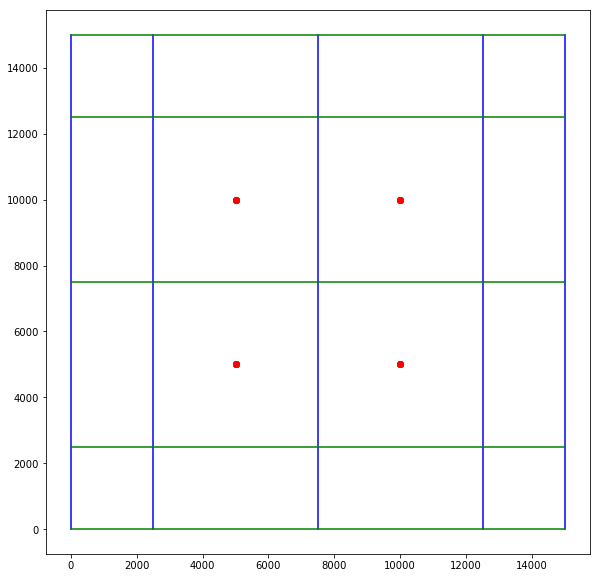

In [9]:
#code to create grid 1
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array = np.array(delr) #changes delr values from float to array
print (delr_array) #prints those values
print (delr_array.sum()) #prints the sum of those values
ymax = delr_array.sum() #assigns the sum of the list to ymax
ymin = 0 #sets ymin equal to zero
xmax = ymax #makes xmax equal to ymax which is equal to the sum of the list
xmin = 0 #sets xmin equal to zero
x = 0 #sets x equal to zero
y = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin, xmin], [ymin, ymax], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx in delr: #dx will go through the values in delr one by one in the loop
    x = x + dx #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x, x], [ymin, ymax], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin, xmax], [ymin, ymin], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy in delr: 
    y = y + dy
    plt.plot([xmin, xmax], [y, y], 'g-')

#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid1_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

In [10]:
#Flopy objects
modelname1 = 'p8_pb1' #short for problem 8 part b, grid 1
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws1 = 'temp'
mf1 = flopy.modflow.Modflow(modelname1, exe_name=exe_name, model_ws = model_ws1)

#dis package
#call in the discretization package
nlay = 1
nrow = 4
ncol = 4
delr = delr
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis1 = flopy.modflow.ModflowDis(mf1, nlay=nlay, nrow=nrow, ncol=ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas1 = flopy.modflow.ModflowBas(mf1, ibound=ibound, strt=strt)

pr1 = 15000 #pumping rate
wel_sp1 = [[0, 2, 1, pr1],
             [0, 1, 1, -pr1],
             [0, 1, 2, -pr1],
             [0, 2, 2, -pr1]]
stress_period_data = {0: wel_sp1}
wel1 = flopy.modflow.ModflowWel(mf1, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg1 = flopy.modflow.ModflowPcg(mf1, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf1 = flopy.modflow.ModflowLpf(mf1, hk=hk, laytyp=laytyp)

#oc package
oc1 = flopy.modflow.ModflowOc(mf1)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through 2500, 5000, 5000, 2500 and apply it to ghb_sp1 for loop
delr_float = delr_array.astype(np.float) #change delr into a list of floats
print(delr_float) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp1 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp1.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp1} #stores list of values into ghb_spd
ghb1 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp1) #print to make sure values are correct

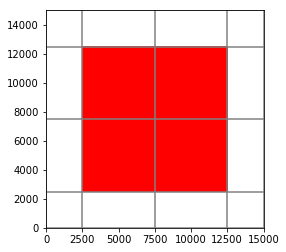

In [18]:
#create grid using model map
mm=flopy.plot.ModelMap(model=mf1)
mm.plot_grid()
mm.plot_bc('WEL')

In [19]:
# Write the MODFLOW model input files
mf1.write_input()

# Run the MODFLOW model
success, buff = mf1.run_model()

### Grid 2

| Column # | Row Spacing |
|----------|-------------|
| 1        | 1750        |
| 2        | 2000        |
| 3        | 2500        |
| 4        | 2500        |
| 5        | 2500        |
| 6        | 2000        |
| 7        | 1750        |

In [21]:
print(os.getcwd())
delr2 = [] #creates an empty list
f2 = open('../Data/table8.1_grid2.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f2):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist2 = line.strip().split(',') 
    
    value2 = float(linelist2[1]) #changes the values in the list to floats
    print(value2) #prints the values
    delr2.append(value2) #puts the floats into the empty list, delr 
    
print(delr2) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
1750.0
2000.0
2500.0
2500.0
2500.0
2000.0
1750.0
[1750.0, 2000.0, 2500.0, 2500.0, 2500.0, 2000.0, 1750.0]


[ 1750.  2000.  2500.  2500.  2500.  2000.  1750.]
15000.0
5000.0 5000.0
5000.0 10000.0
10000.0 10000.0
10000.0 5000.0


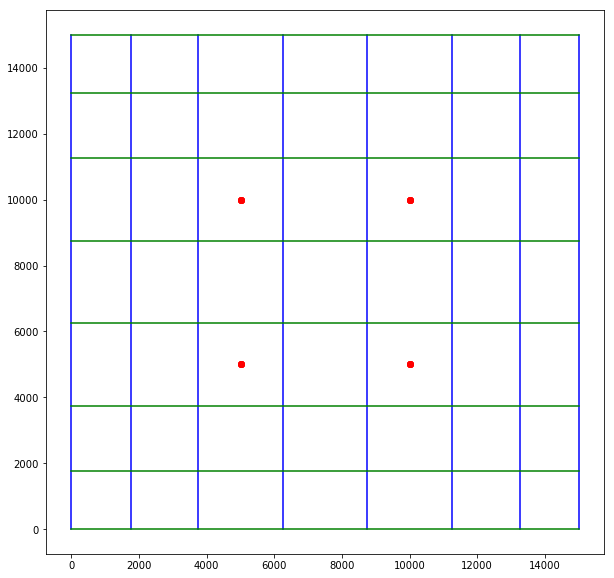

In [22]:
#code to create grid 2
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array2 = np.array(delr2) #changes delr values from float to array
print (delr_array2) #prints those values
print (delr_array2.sum()) #prints the sum of those values
ymax2 = delr_array2.sum() #assigns the sum of the list to ymax
ymin2 = 0 #sets ymin equal to zero
xmax2 = ymax2 #makes xmax equal to ymax which is equal to the sum of the list
xmin2 = 0 #sets xmin equal to zero
x2 = 0 #sets x equal to zero
y2 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin2, xmin2], [ymin2, ymax2], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx2 in delr2: #dx will go through the values in delr one by one in the loop
    x2 = x2 + dx2 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x2, x2], [ymin2, ymax2], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin2, xmax2], [ymin2, ymin2], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy2 in delr2: 
    y2 = y2 + dy2
    plt.plot([xmin2, xmax2], [y2, y2], 'g-')

#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid2_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

In [23]:
#Flopy objects
modelname2 = 'p8_pb2' #short for problem 8 part b, grid 2
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws2 = 'temp'
mf2 = flopy.modflow.Modflow(modelname2, exe_name=exe_name, model_ws = model_ws2)

#dis package
#call in the discretization package
nlay = 1
nrow = 7
ncol = 7
delr = delr2
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis2 = flopy.modflow.ModflowDis(mf2, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas2 = flopy.modflow.ModflowBas(mf2, ibound=ibound, strt=strt)

pr2 = 15000 #pumping rate
wel_sp2 = [[0, 4, 2, pr2],
             [0, 2, 2, -pr2],
             [0, 2, 4, -pr2],
             [0, 4, 4, -pr2]]
stress_period_data = {0: wel_sp2}
wel2 = flopy.modflow.ModflowWel(mf2, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg2 = flopy.modflow.ModflowPcg(mf2, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf2 = flopy.modflow.ModflowLpf(mf2, hk=hk, laytyp=laytyp)

#oc package
oc2 = flopy.modflow.ModflowOc(mf2)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float2 = delr_array2.astype(np.float) #change delr_array into a list of floats
print(delr_float2) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float2] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp2 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp2.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp2} #stores list of values into ghb_spd
ghb2 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp2) #print to make sure values are correct

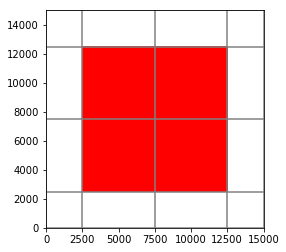

In [31]:
#create grid using model map
mm=flopy.plot.ModelMap(model=mf1)
mm.plot_grid()
mm.plot_bc('WEL')

In [32]:
# Write the MODFLOW model input files
mf2.write_input()

# Run the MODFLOW model
success, buff = mf2.run_model()

### Grid 3

| Column # | Row Spacing |
|----------|-------------|
| 1        | 1250        |
| 2        | 1666.7      |
| 3        | 1666.7      |
| 4        | 1666.7      |
| 5        | 1666.7      |
| 6        | 1666.7      |
| 7        | 1666.7      |
| 8        | 1666.7      |
| 9        | 1666.7      |
| 10       | 1250        |

In [34]:
print(os.getcwd())
delr3 = [] #creates an empty list
f3 = open('../Data/table8.1_grid3.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f3):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist3 = line.strip().split(',') 
    
    value3 = float(linelist3[1]) #changes the values in the list to floats
    print(value3) #prints the values
    delr3.append(value3) #puts the floats into the empty list, delr 
    
print(delr3) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
1250.0
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1666.7
1250.0
[1250.0, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1666.7, 1250.0]


[ 1250.   1666.7  1666.7  1666.7  1666.7  1666.7  1666.7  1666.7  1666.7
  1250. ]
15833.6
5416.75 5416.75
5416.75 10416.85
10416.85 10416.85
10416.85 5416.75


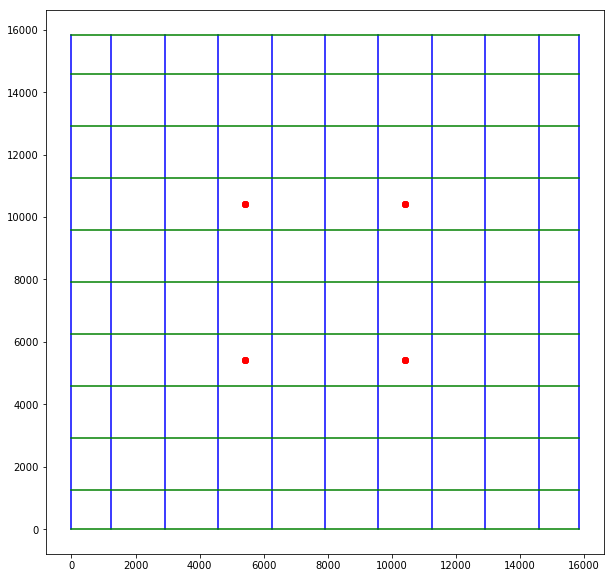

In [35]:
#code to create grid 3
fig3 = plt.figure(figsize=(10, 10))
ax3 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array3 = np.array(delr3) #changes delr values from float to array
print (delr_array3) #prints those values
print (delr_array3.sum()) #prints the sum of those values
ymax3 = delr_array3.sum() #assigns the sum of the list to ymax
ymin3 = 0 #sets ymin equal to zero
xmax3 = ymax3 #makes xmax equal to ymax which is equal to the sum of the list
xmin3 = 0 #sets xmin equal to zero
x3 = 0 #sets x equal to zero
y3 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin3, xmin3], [ymin3, ymax3], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx3 in delr3: #dx will go through the values in delr one by one in the loop
    x3 = x3 + dx3 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x3, x3], [ymin3, ymax3], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin3, xmax3], [ymin3, ymin3], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy3 in delr3: 
    y3 = y3 + dy3
    plt.plot([xmin3, xmax3], [y3, y3], 'g-')
    
#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid3_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

In [36]:
#Flopy objects
modelname3 = 'p8_pb3' #short for problem 8 part b, grid 3
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws3 = 'temp'
mf3 = flopy.modflow.Modflow(modelname3, exe_name=exe_name, model_ws = model_ws3)

#dis package
#call in the discretization package
nlay = 1
nrow = 10
ncol = 10
delr = delr3
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis3 = flopy.modflow.ModflowDis(mf3, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas3 = flopy.modflow.ModflowBas(mf3, ibound=ibound, strt=strt)

pr3 = 15000 #pumping rate
wel_sp3 = [[0, 6, 3, pr3],
         [0, 3, 3, -pr3],
         [0, 3, 6, -pr3],
         [0, 6, 6, -pr3]]
stress_period_data = {0: wel_sp3}
wel3 = flopy.modflow.ModflowWel(mf3, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg3 = flopy.modflow.ModflowPcg(mf3, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400 #times cell thickness top-botm
laytyp = np.zeros((nlay))
lpf3 = flopy.modflow.ModflowLpf(mf3, hk=hk, laytyp=laytyp)

#oc package
oc3 = flopy.modflow.ModflowOc(mf3)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float3 = delr_array3.astype(np.float) #change delr_array into a list of floats
print(delr_float3) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float3] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp3 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp3.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp3} #stores list of values into ghb_spd
ghb3 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp3) #print to make sure values are correct

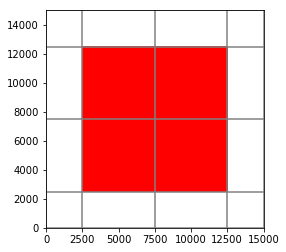

In [44]:
#create grid using model map
mm=flopy.plot.ModelMap(model=mf1)
mm.plot_grid()
mm.plot_bc('WEL')

In [45]:
# Write the MODFLOW model input files
mf3.write_input()

# Run the MODFLOW model
success, buff = mf3.run_model()

### Grid 4

| Column # | Row Spacing |
|----------|-------------|
| 1        | 500         |
| 2        | 1000        |
| 3        | 1000        |
| 4        | 1000        |
| 5        | 1000        |
| 6        | 1000        |
| 7        | 1000        |
| 8        | 1000        |
| 9        | 1000        |
| 10       | 1000        |
| 11       | 1000        |
| 12       | 1000        |
| 13       | 1000        |
| 14       | 1000        |
| 15       | 1000        |
| 16       | 500         |

In [47]:
print(os.getcwd())
delr4 = [] #creates an empty list
f4 = open('../Data/table8.1_grid4.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f4):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist4 = line.strip().split(',') 
    
    value4 = float(linelist4[1]) #changes the values in the list to floats
    print(value4) #prints the values
    delr4.append(value4) #puts the floats into the empty list, delr 
    
print(delr4) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
500.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
500.0
[500.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 500.0]


[  500.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.   500.]
15000.0
5000.0 5000.0
5000.0 10000.0
10000.0 10000.0
10000.0 5000.0


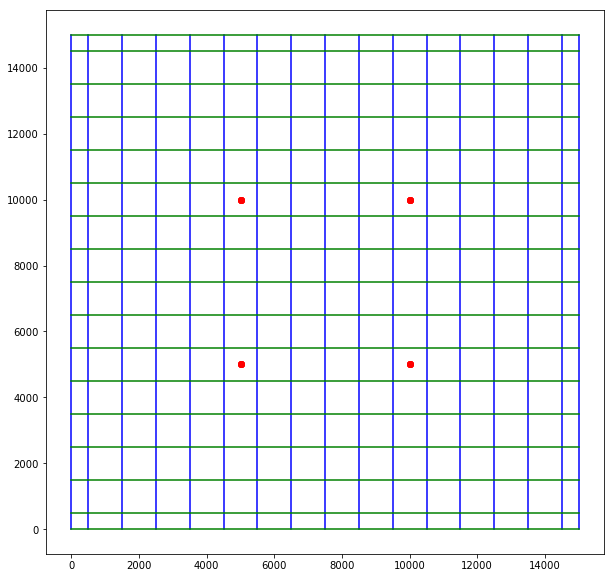

In [48]:
#code to create grid 4
fig4 = plt.figure(figsize=(10, 10))
ax4 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array4 = np.array(delr4) #changes delr values from float to array
print (delr_array4) #prints those values
print (delr_array4.sum()) #prints the sum of those values
ymax4 = delr_array4.sum() #assigns the sum of the list to ymax
ymin4 = 0 #sets ymin equal to zero
xmax4 = ymax4 #makes xmax equal to ymax which is equal to the sum of the list
xmin4 = 0 #sets xmin equal to zero
x4 = 0 #sets x equal to zero
y4 = 0 #sets y equal to zero

plt.plot([xmin4, xmin4], [ymin4, ymax4], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx4 in delr4: #dx will go through the values in delr one by one in the loop
    x4 = x4 + dx4 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x4, x4], [ymin4, ymax4], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin4, xmax4], [ymin4, ymin4], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy4 in delr4: 
    y4 = y4 + dy4
    plt.plot([xmin4, xmax4], [y4, y4], 'g-')

#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid4_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

In [49]:
#Flopy objects
modelname4 = 'p8_pb4' #short for problem 8 part b, grid 4
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws4 = 'temp'
mf4 = flopy.modflow.Modflow(modelname4, exe_name=exe_name, model_ws = model_ws4)

#dis package
#call in the discretization package
nlay = 1
nrow = 16
ncol = 16
delr = delr4
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis4 = flopy.modflow.ModflowDis(mf4, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas4 = flopy.modflow.ModflowBas(mf4, ibound=ibound, strt=strt)

#wel package
pr4 = 15000 #pumping rate
wel_sp4 = [[0, 10, 5, pr4],
           [0, 5, 5, -pr4],
           [0, 5, 10, -pr4],
           [0, 10, 10, -pr4]]
stress_period_data = {0: wel_sp4}
wel4 = flopy.modflow.ModflowWel(mf4, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg4 = flopy.modflow.ModflowPcg(mf4, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf4 = flopy.modflow.ModflowLpf(mf4, hk=hk, laytyp=laytyp)

#oc package
oc4 = flopy.modflow.ModflowOc(mf4)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float4 = delr_array4.astype(np.float) #change delr_array into a list of floats
print(delr_float4) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float4] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp4 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp4.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp4} #stores list of values into ghb_spd
ghb4 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp4) #print to make sure values are correct

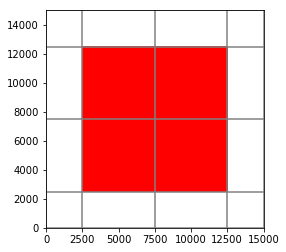

In [57]:
#create grid using model map
mm=flopy.plot.ModelMap(model=mf1)
mm.plot_grid()
mm.plot_bc('WEL')

In [58]:
# Write the MODFLOW model input files
mf4.write_input()

# Run the MODFLOW model
success, buff = mf4.run_model()

### Grid 5

| Column # | Row Spacing |
|----------|-------------|
| 1        | 416.7       |
| 2        | 416.7       |
| 3        | 416.7       |
| 4        | 416.7       |
| 5        | 416.7       |
| 6        | 416.7       |
| 7        | 555.6       |
| 8        | 555.6       |
| 9        | 555.6       |
| 10       | 555.6       |
| 11       | 555.6       |
| 12       | 555.6       |
| 13       | 555.6       |
| 14       | 555.6       |
| 15       | 555.6       |
| 16       | 555.6       |
| 17       | 555.6       |
| 18       | 555.6       |
| 19       | 555.6       |
| 20       | 555.6       |
| 21       | 555.6       |
| 22       | 555.6       |
| 23       | 555.6       |
| 24       | 555.6       |
| 25       | 416.7       |
| 26       | 416.7       |
| 27       | 416.7       |
| 28       | 416.7       |
| 29       | 416.7       |
| 30       | 416.7       |

In [60]:
print(os.getcwd())
delr5 = [] #creates an empty list
f5 = open('../Data/table8.1_grid5.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
    #the four loop below creates a statement that if i == 0 (if it's the first
    #row then it will skip it (continue) and move on with the for loop)
    #we skip the first row in our table/csv file because the headers would give
    #us an error since they aren't numerical values.
for i,line in enumerate(f5):
    if i == 0: 
        continue
        
    #"line.strip" gets rid of any extra spaces in the margins of the plot
    #"split" sections of the individual values according to whatever you put in the quotes
    linelist5 = line.strip().split(',') 
    
    value5 = float(linelist5[1]) #changes the values in the list to floats
    print(value5) #prints the values
    delr5.append(value5) #puts the floats into the empty list, delr 
    
print(delr5) #prints the list

C:\VT\USGS Internship\modflow_epa.git\Notebooks
416.7
416.7
416.7
416.7
416.7
416.7
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
555.6
416.7
416.7
416.7
416.7
416.7
416.7
[416.7, 416.7, 416.7, 416.7, 416.7, 416.7, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 555.6, 416.7, 416.7, 416.7, 416.7, 416.7, 416.7]


[ 416.7  416.7  416.7  416.7  416.7  416.7  555.6  555.6  555.6  555.6
  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6  555.6
  555.6  555.6  555.6  555.6  416.7  416.7  416.7  416.7  416.7  416.7]
15001.2
5000.4 5000.4
5000.4 10000.8
10000.8 10000.0
10000.8 5000.0


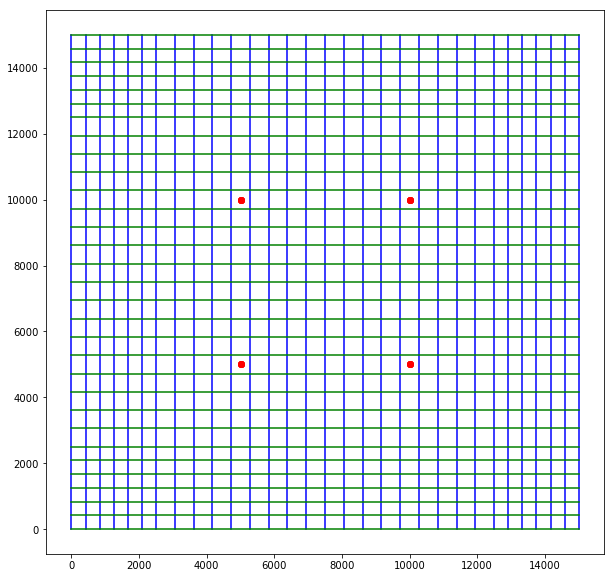

In [42]:
#code to create grid 5
fig5 = plt.figure(figsize=(10, 10))
ax5 = fig.add_subplot(1, 1, 1, aspect='equal') #makes the length and width of the grid equal on all four sides
delr_array5 = np.array(delr5) #changes delr values from float to array
print (delr_array5) #prints those values
print (delr_array5.sum()) #prints the sum of those values
ymax5 = delr_array5.sum() #assigns the sum of the list to ymax
ymin5 = 0 #sets ymin equal to zero
xmax5 = ymax5 #makes xmax equal to ymax which is equal to the sum of the list
xmin5 = 0 #sets xmin equal to zero
x5 = 0 #sets x equal to zero
y5 = 0 #sets y equal to zero

#before moving on to this code, it helps to draw out an image of a graph with each corner labled with the coordinates of that point
#top left - (xmin, ymax)
#bottom left - (xmin, ymin)
#top right - (xmax, ymax)
#bottom right - (xmax, ymin)
plt.plot([xmin5, xmin5], [ymin5, ymax5], 'b-') #plots the first column line (on the left). Must be outside of the loop.
#'b-' creates a blue line out of dashes
for dx5 in delr5: #dx will go through the values in delr one by one in the loop
    x5 = x5 + dx5 #add the dx value to x, which is zero, and then store that new value into x
    plt.plot([x5, x5], [ymin5, ymax5], 'b-') #plot that point and then loop back to top

    #repeat the process above but with the y values to make the rows
plt.plot([xmin5, xmax5], [ymin5, ymin5], 'g-') #plots the first row line (on the bottom). Must be outside of the loop
#'g-' creates a green line with dashes
for dy5 in delr5: 
    y5 = y5 + dy5
    plt.plot([xmin5, xmax5], [y5, y5], 'g-')

#create wells
#bottom left - (pumping well)
xes = []
ys = []
x=0
f = open('../Data/problem8_grid5_wells.csv') #opens the csv file; the two periods (.) means that you are goin backwards into the folders.
    
for i,line in enumerate(f):
    if i == 0: 
        continue
        
    linelist = line.strip().split(',') 
    x = float(linelist[0]) #changes the values in the list to floats
    y = float(linelist[1])
    print(x, y) #prints the values
    xes.append(x) #puts the floats into the empty list, x
    ys.append(y)

for n in xes: 
    plt.plot(xes, ys, 'ro')

In [43]:
#Flopy objects
modelname5 = 'p8_pb5' #short for problem 8 part b, grid 5
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws5 = 'temp'
mf5 = flopy.modflow.Modflow(modelname5, exe_name=exe_name, model_ws = model_ws5)

#dis package
nlay = 1
nrow = 30
ncol = 30
delr = delr5
delc = delr #set delr values equal to delc
top = 0 #an array of the top elevation of layer 1
botm = -1 #an array of the bottom elevation of layer 1
nper = 1 #number of periods
perlen = 0.2 #length of stress period
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
dis5 = flopy.modflow.ModflowDis(mf5, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

#bas package
ibound = np.ones((nlay, nrow, ncol))
strt = np.zeros((nlay, nrow, ncol))
bas5 = flopy.modflow.ModflowBas(mf5, ibound=ibound, strt=strt)

#wel package
# Remember to use zero-based layer, row, column indices!
pr5 = 15000 #pumping rate
wel_sp5 = [[0, 19, 10, pr5],
             [0, 10, 10, -pr5],
             [0, 10, 19, -pr5],
             [0, 19, 19, -pr5]]
stress_period_data = {0: wel_sp5}
wel5 = flopy.modflow.ModflowWel(mf5, stress_period_data=stress_period_data)

#pcg package
mxiter = 50
hclose = 0.0001
pcg5 = flopy.modflow.ModflowPcg(mf5, mxiter=mxiter, hclose=hclose)

#lpf package
hk = 2400
laytyp = np.zeros((nlay))
lpf5 = flopy.modflow.ModflowLpf(mf5, hk=hk, laytyp=laytyp)

#oc package
oc5 = flopy.modflow.ModflowOc(mf5)

#ghb package
ipakcb = 50
stage = 0.0
b = top - botm #bed thickness
l = 1250 #length/distance

#cycle through delr_float and apply it to ghb_sp1 for loop
delr_float5 = delr_array5.astype(np.float) #change delr_array into a list of floats
print(delr_float5) #print list to check it's correct

#this iterates through the list of floats we just created 'delr_float'
#and assigns each one to the value of w as it loops through
#w is then multiplied by 2400 and divided by 1250 and that value is stored into w

cond = [(b * hk * w)/l for w in delr_float5] #calculating conductivity while looping 
#through values of w and storing those values into cond
print(cond) #print list to make sure values are correct

ghb_sp5 = [] #create blank list
for col, c in enumerate(cond): #loop will enumerate through cond and put values into c
                            #and will go through col starting at 0 until loop ends (at 3)
    ghb_sp2.append([0, 0, col, stage, c]) #creates the list of values

ghb_spd = {0: ghb_sp5} #stores list of values into ghb_spd
ghb5 = flopy.modflow.ModflowGhb(mf1, ipakcb=ipakcb, stress_period_data=ghb_spd)

print(ghb_sp5) #print to make sure values are correct

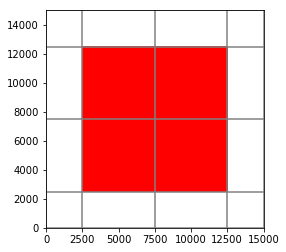

In [66]:
#create grid using model map
mm=flopy.plot.ModelMap(model=mf1)
mm.plot_grid()
mm.plot_bc('WEL')

In [67]:
# Write the MODFLOW model input files
mf5.write_input()

# Run the MODFLOW model
success, buff = mf5.run_model()

In [69]:
import pandas as pd
table = pd.read_csv('../Data/table8.2.csv')

table.columns #displays all the column names in the file

#prints out the first 5 rows into a table
table.head()

,Grid,# Nodes,Total Iteration,CPU',1,2,3
0,1,16.0,47.0,5.64,1.956,1.493,2.806
1,2,49.0,74.0,8.12,1.971,1.537,2.816
2,3,100.0,96.0,13.02,1.962,1.546,2.807
3,4,256.0,124.0,30.33,1.955,1.550,2.801
4,5,900.0,143.0,106.54,1.952,1.550,2.797


In [71]:
#prints the whole dataframe instead of just the first 5 rows
print(table)

       Grid  # Nodes  Total Iteration    CPU'      1      2      3
0         1     16.0             47.0    5.64  1.956  1.493  2.806
1         2     49.0             74.0    8.12  1.971  1.537  2.816
2         3    100.0             96.0   13.02  1.962  1.546  2.807
3         4    256.0            124.0   30.33  1.955  1.550  2.801
4         5    900.0            143.0  106.54  1.952  1.550  2.797
5  analytic      NaN              NaN     NaN  2.040  1.630  2.950


### MODEL OUTPUT

_Drawdown, iteration and CPU data are given in Tables 8.2, 8.3, 8.4, and 8.5 for parts a, b,
c, and d, respectively. A comparison is also made to analytical results obtained from the
image well technique._

##### _Figure 8.3. Drawdown (m) at 0.2 days for the 16 x 16 grid simulation of Part b._

### DISCUSSION OF RESULTS

_Drawdowns for the final timestep of part b are shown in Figure 8.3 for the 16 x 16 grid.
The accuracy of the answer is highly dependent upon the grid configuration used (Table 8.3).
This is because in early time, the gradients are much steeper in the vicinity of the pumping
well. A fine grid can approximate this rapid spatial variation much better than a coarse grid.
Notice that the grid design can take on vastly different configurations depending on the intent
of the modeling. As a general role, the grid should be designed to match the curvature of the
drawdown cone._